In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add root path (parent folder) to path
import os
import sys
cwd = os.getcwd()
root_path = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.insert(0, root_path)

import pysta
import stc
import stcl

import os

%load_ext autoreload
%autoreload 2

## load clustering results

In [2]:
results_path = os.path.join(root_path,'results')
def load_clustering(dataset_name, tap=8, cluster_dim=2):
    folder_name = os.path.join(results_path, "binary_stim_{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, cluster_dim))

#     folder_name = "{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, cluster_dim)
    filename = os.path.join(folder_name, "clusters_.csv")    

    return pd.read_csv(filename)

cluster_dim = 2
# cluster_dim = 3

cluster1 = load_clustering("20180618", cluster_dim=cluster_dim)
cluster1["dataset"] = "20180618"
cluster2 = load_clustering("20180621", cluster_dim=cluster_dim)
cluster2["dataset"] = "20180621"
cluster3 = load_clustering("20180626", cluster_dim=cluster_dim)
cluster3["dataset"] = "20180626"
# cluster4 = load_clustering("20180828")
# cluster4["dataset"] = "20180828"


# combine all patches 
# cluster = pd.concat([cluster1, cluster2, cluster3, cluster4])
cluster = pd.concat([cluster1, cluster2, cluster3])

print("total = ", len(cluster))

total =  389


In [3]:
print(cluster["sta_cell_type"].value_counts())
print(cluster["sta_cell_type"].value_counts() / len(cluster))

OFF        169
unknown    129
ON          91
Name: sta_cell_type, dtype: int64
OFF        0.434447
unknown    0.331620
ON         0.233933
Name: sta_cell_type, dtype: float64


In [4]:
cluster.head()

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,dataset
0,12a,1978,0.469666,0.038540,0.971392,0.754007,0.737358,True,0.522711,0.045648,0.636834,0.370558,0.036202,0.363166,0.420599,OFF,20180618
1,12b,1228,0.278502,0.029235,0.920008,0.895442,0.871839,True,0.262921,0.028102,0.657218,0.434911,0.056574,0.342782,0.252902,ON,20180618
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702,unknown,20180618
3,13a,963,0.369678,0.033203,1.113298,1.056309,1.029772,True,0.366133,0.032059,0.899287,0.797753,0.109916,0.100713,0.466382,OFF,20180618
4,13b,415,0.575904,0.034440,1.266391,1.249651,1.216659,True,0.601974,0.038445,0.614331,0.504505,0.059151,0.385669,0.184996,ON,20180618


In [6]:
cluster.groupby("sta_cell_type").mean()

,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
sta_cell_type,,,,,,,,,,,,,,
OFF,4555.485207,0.464034,0.030196,1.177086,1.092602,1.045497,True,0.564776,0.065668,0.552559,0.524328,0.076593,0.447441,0.119042
ON,3263.219780,0.427825,0.026821,0.931845,0.868955,0.839521,True,0.567961,0.063317,0.515776,0.488803,0.058147,0.484224,0.064945
unknown,2894.542636,0.242930,0.035247,2.256193,2.006904,1.901224,True,0.417851,0.081656,0.547442,0.486005,0.104345,0.452558,-0.159352


In [5]:
cluster.groupby("sta_cell_type").median()

,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
sta_cell_type,,,,,,,,,,,,,,
OFF,2035,0.457944,0.027190,0.744122,0.705149,0.690602,True,0.548784,0.035486,0.545045,0.441379,0.034091,0.454955,0.043872
ON,2190,0.370625,0.024686,0.790669,0.728066,0.708054,True,0.528366,0.034654,0.529911,0.438066,0.034890,0.470089,-0.090931
unknown,379,0.193277,0.030387,1.542122,1.461612,1.369387,True,0.289916,0.041482,0.506024,0.316327,0.048073,0.493976,-0.142001


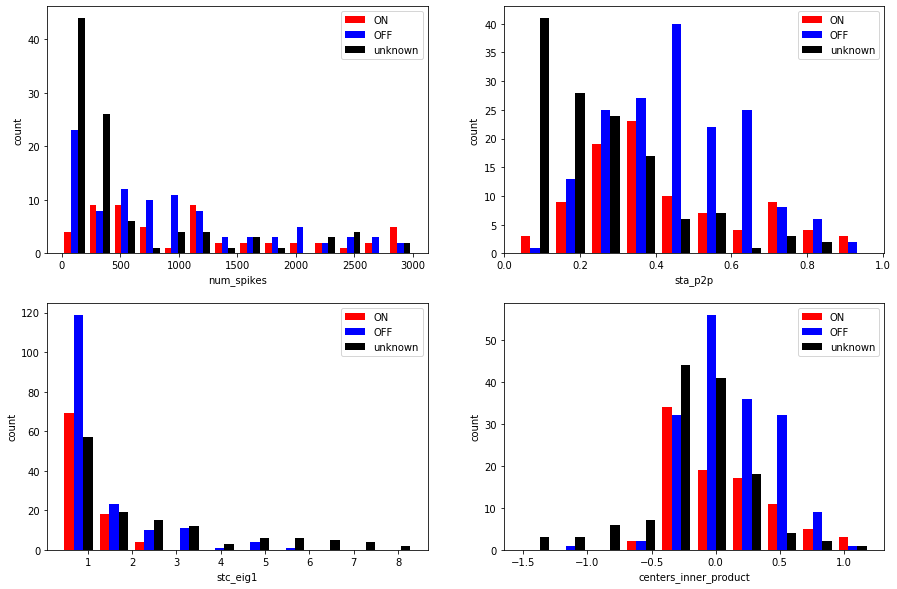

In [15]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(cluster, "num_spikes", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"],
                         bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_group(cluster, "sta_p2p", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(223)
pysta.plot_hist_by_group(cluster, "stc_eig1", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(224)
pysta.plot_hist_by_group(cluster, "centers_inner_product", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
# plt.savefig("figure/combined_cluster_dim{}_stat.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_stat.png".format( cluster_dim))

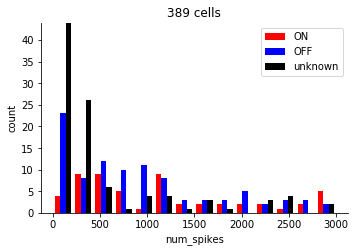

In [17]:
# num spikes histogram

plt.figure(figsize=(5.5,3.5))

pysta.plot_hist_by_group(cluster, "num_spikes", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"],
                         bins=np.linspace(0,3000,15))
# pysta.plot_hist_by_cell_type(cluster, "num_spikes", bins=np.linspace(0,3000,15))
plt.title("{} cells".format(len(cluster)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

# plt.savefig("figure/combined_cluster_dim{}_num_spikes.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_num_spikes.png".format(cluster_dim))

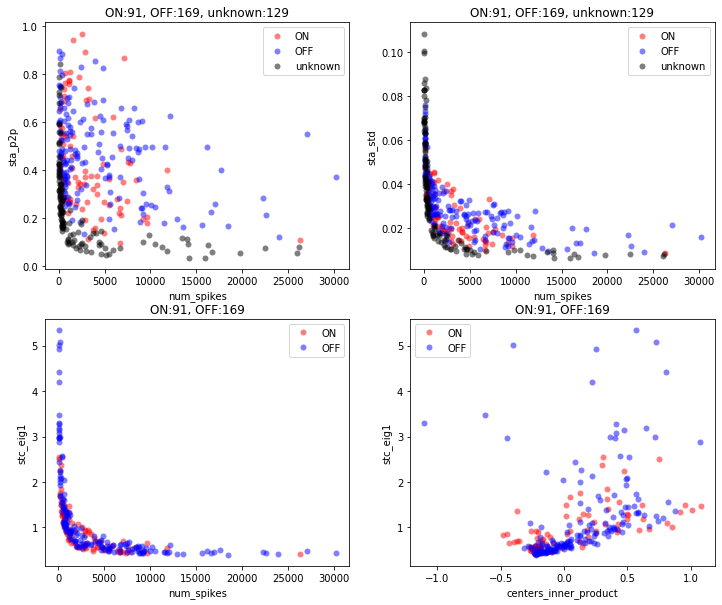

In [49]:
def plot_scatter(cluster):
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "sta_p2p"], 
                                "sta_cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'])
#                                 "cell_type", ["ON", "OFF"], ["r","b"])

    plt.subplot(222)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "sta_std"], 
                                "sta_cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'])                                
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
#     plt.xlim(0,2000)
    
    plt.subplot(223)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "stc_eig1"], 
                                "sta_cell_type", ["ON", "OFF"], ["r","b"])
#     plt.xscale('log')
#     plt.yscale('log')

    plt.subplot(224)
    pysta.plot_scatter_by_group(cluster, ["centers_inner_product", "stc_eig1"], 
                                "sta_cell_type", ["ON", "OFF"])
    
    
def plot_compare_scatter_(cluster):
    plt.subplot(233)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "inner_product"], ["ON", "OFF"])
    plt.xscale('log')
    # plt.yscale('log')

    plt.subplot(234)
    pysta.plot_scatter_by_goup(cluster, ["PSNR", "PSNR1"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

    plt.subplot(235)
    pysta.plot_scatter_by_group(cluster, ["PSNR", "PSNR2"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

plot_scatter(cluster)

# plt.savefig("figure/combined_cluster_dim{}_p2p_eig1.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_p2p_eig1".format( cluster_dim))


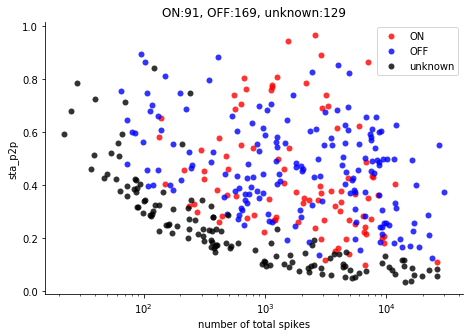

In [25]:
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
pysta.plot_scatter_by_group(cluster, ["num_spikes", "sta_p2p"], 
                            "sta_cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'], alpha=0.8)
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
plt.xscale('log')
plt.xlabel('number of total spikes')
# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_PSNR_large.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_PSNR_large.png".format(cluster_dim))

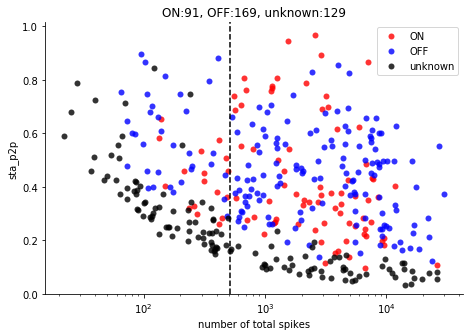

In [27]:
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
pysta.plot_scatter_by_group(cluster, ["num_spikes", "sta_p2p"], 
                            "sta_cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'], alpha=0.8)
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
plt.xscale('log')
plt.xlabel('number of total spikes')
# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

YLIM = list(plt.ylim())
YLIM[0] = 0
plt.ylim(YLIM)
plt.plot([512,512], YLIM, 'k--')

# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_peak_diff_large.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_peak_diff_large.png".format(cluster_dim))

In [28]:
cluster

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,dataset
0,12a,1978,0.469666,0.038540,0.971392,0.754007,0.737358,True,0.522711,0.045648,0.636834,0.370558,0.036202,0.363166,0.420599,OFF,20180618
1,12b,1228,0.278502,0.029235,0.920008,0.895442,0.871839,True,0.262921,0.028102,0.657218,0.434911,0.056574,0.342782,0.252902,ON,20180618
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702,unknown,20180618
3,13a,963,0.369678,0.033203,1.113298,1.056309,1.029772,True,0.366133,0.032059,0.899287,0.797753,0.109916,0.100713,0.466382,OFF,20180618
4,13b,415,0.575904,0.034440,1.266391,1.249651,1.216659,True,0.601974,0.038445,0.614331,0.504505,0.059151,0.385669,0.184996,ON,20180618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,86c,705,0.276596,0.027016,1.188350,1.152660,1.125220,True,0.671875,0.108309,0.108155,0.279251,0.026847,0.891845,0.115506,ON,20180626
152,86d,151,0.403974,0.046548,2.244849,2.097623,1.944011,True,1.000000,0.363008,0.013423,0.401361,0.046253,0.986577,0.476190,ON,20180626
153,87a,9120,0.602632,0.027801,0.590420,0.517161,0.512286,True,0.678760,0.035641,0.600716,0.401597,0.028217,0.399284,0.056941,OFF,20180626
154,87b,3797,0.321306,0.019283,0.487358,0.482080,0.475510,True,0.280390,0.030543,0.473213,0.388212,0.032063,0.526787,-0.128654,ON,20180626


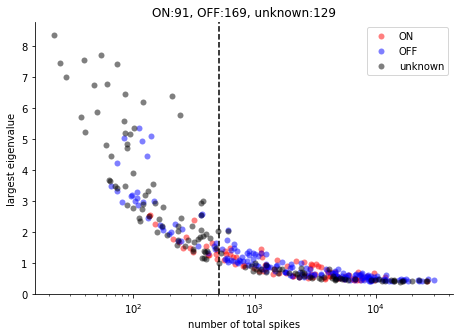

In [30]:
# pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
#                             "cell_type", ["ON", "OFF", "unknown"], ["r","b",'k'],
# #                             "cell_type", ["ON", "OFF"], ["r","b"],
#                             alpha=0.5)
plt.figure(figsize=(7.5,5)) # larger
# plt.figure(figsize=(5,3.5))
# plt.scatter(cluster["num_spikes"], cluster["eig1"], c='k', alpha=0.3)
pysta.plot_scatter_by_group(cluster, ["num_spikes", "stc_eig1"], 
                            "sta_cell_type", ["ON", "OFF","unknown"], ["r","b","k"],
#                                 "cell_type", ["ON", "OFF"], ["r","b"])
                            alpha=0.5)

YLIM = plt.ylim()
# YLIM = [0, YLIM[1]]

plt.plot([512,512], YLIM, 'k--')
# plt.plot([512*4,512*4], YLIM, 'b--')
# plt.plot([512*5,512*5], YLIM, 'b--')

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('number of total spikes')
plt.ylabel('largest eigenvalue')

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_eig1_large.pdf".format(cluster_dim))
# plt.savefig("figure/combined_cluster_dim{}_num_spikes_vs_eig1_large.png".format(cluster_dim))

## select channels with enough spikes

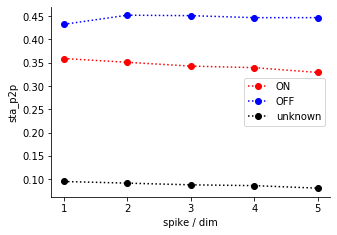

In [34]:
# consider different threshold

spike_per_dims = [1, 2, 3, 4, 5]
# col_name = "counts"
# col_name = "ratios"
col_name = "sta_p2p"
# col_name = "stc_eig1"
    
mean_values = list()
for spike_per_dim in spike_per_dims:
    idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
    cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

    
#     print("spike / dim=", spike_per_dim)
#     print("total = ", len(cluster_with_enough_spikes))
    
    counts = cluster_with_enough_spikes["sta_cell_type"].value_counts()[["ON", "OFF", "unknown"]]
    ratios = counts / len(cluster_with_enough_spikes)
#     print(counts)
#     print(ratios)

    if col_name == "counts":
        val = np.array(counts)
    elif col_name == "ratios":
        val = np.array(ratios)        
    else:
    #     val =cluster_with_enough_spikes.groupby("cell_type").mean()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index
        val =cluster_with_enough_spikes.groupby("sta_cell_type").median()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index    
                                #cluster_with_enough_spikes.groupby("cell_type").mean().loc[["ON", "OFF", "unknown"]].reset_index()["PSNR"]
        val = np.array(val)
    
    mean_values.append(val)
    
#     plt.plot(spike_per_dim, "PSNR=",mean_PSNRs[0])
mean_values = np.array(mean_values)


plt.figure(figsize=(5,3.5))
plt.plot(spike_per_dims, mean_values[:,0], 'or:')
plt.plot(spike_per_dims, mean_values[:,1], 'ob:')
plt.plot(spike_per_dims, mean_values[:,2], 'ok:')
plt.legend(["ON", "OFF", "unknown"])

plt.ylabel(col_name)
plt.xlabel("spike / dim")
plt.xticks(spike_per_dims)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# plt.savefig("figure/combined_cluster_dim{}_spike_per_dim_vs_{}.pdf".format(cluster_dim, col_name))

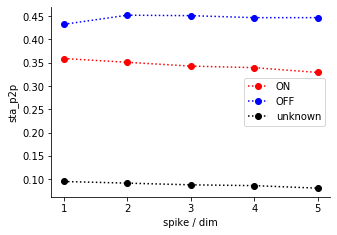

In [37]:
# consider different threshold

spike_per_dims = [1, 2, 3, 4, 5]
col_name = "sta_p2p"
    
mean_values = list()
for spike_per_dim in spike_per_dims:
    idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
    cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

    
#     print("spike / dim=", spike_per_dim)
#     print("total = ", len(cluster_with_enough_spikes))
    
    counts = cluster_with_enough_spikes["sta_cell_type"].value_counts()[["ON", "OFF", "unknown"]]
    ratios = counts / len(cluster_with_enough_spikes)
#     print(counts)
#     print(ratios)

    if col_name == "counts":
        val = np.array(counts)
    elif col_name == "ratios":
        val = np.array(ratios)        
    else:
    #     val =cluster_with_enough_spikes.groupby("cell_type").mean()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index
        val =cluster_with_enough_spikes.groupby("sta_cell_type").median()[col_name].loc[["ON", "OFF", "unknown"]] # keep the index    
                                #cluster_with_enough_spikes.groupby("cell_type").mean().loc[["ON", "OFF", "unknown"]].reset_index()["PSNR"]
        val = np.array(val)
    
    mean_values.append(val)
    
#     plt.plot(spike_per_dim, "PSNR=",mean_PSNRs[0])
mean_values = np.array(mean_values)


plt.figure(figsize=(5,3.5))
plt.plot(spike_per_dims, mean_values[:,0], 'or:')
plt.plot(spike_per_dims, mean_values[:,1], 'ob:')
plt.plot(spike_per_dims, mean_values[:,2], 'ok:')
plt.legend(["ON", "OFF", "unknown"])

plt.ylabel(col_name)
plt.xlabel("spike / dim")
plt.xticks(spike_per_dims)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# plt.savefig("figure/combined_cluster_dim{}_spike_per_dim_vs_{}.pdf".format(cluster_dim, col_name))

In [38]:
# with enough spikes
# spike_per_dim = 1 # hyper parameter that I get to choose
# spike_per_dim = 2 # hyper parameter that I get to choose
# spike_per_dim = 3 # hyper parameter that I get to choose
spike_per_dim = 4 # hyper parameter that I get to choose
# spike_per_dim = 5 # hyper parameter that I get to choose

idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

print("total = ", len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["sta_cell_type"].value_counts()[["ON", "OFF", "unknown"]])
print(cluster_with_enough_spikes["sta_cell_type"].value_counts()[["ON", "OFF", "unknown"]] / len(cluster_with_enough_spikes))


total =  171
ON         48
OFF        84
unknown    39
Name: sta_cell_type, dtype: int64
ON         0.280702
OFF        0.491228
unknown    0.228070
Name: sta_cell_type, dtype: float64


In [39]:
cluster_with_enough_spikes

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,dataset
7,14a,5973,0.622300,0.024144,0.620785,0.571746,0.562778,True,0.881822,0.034057,0.652595,0.576627,0.034871,0.347405,-0.223442,ON,20180618
9,17a,5929,0.066453,0.007862,0.436700,0.434049,0.430598,True,0.157592,0.024853,0.500030,0.150404,0.024742,0.499970,-0.252092,unknown,20180618
10,17b,2553,0.096749,0.011362,0.570595,0.559954,0.552507,True,0.148870,0.028227,0.500642,0.153543,0.027519,0.499358,-0.266945,unknown,20180618
21,23a,12115,0.625340,0.027716,0.604328,0.517577,0.516272,True,0.701885,0.034252,0.599517,0.340351,0.029429,0.400483,0.000372,OFF,20180618
22,23b,4619,0.195930,0.016340,0.700543,0.608037,0.595794,True,0.659805,0.036753,0.526504,0.530046,0.029570,0.473496,-0.357312,ON,20180618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,82b,2842,0.432442,0.027887,0.798825,0.714066,0.700224,True,0.568562,0.039782,0.601114,0.192256,0.029944,0.398886,-0.187547,OFF,20180626
144,83a,17646,0.398617,0.019586,0.493440,0.462766,0.458015,True,0.134897,0.019722,0.490446,0.580716,0.032880,0.509554,-0.096563,OFF,20180626
149,86a,3186,0.740741,0.037839,0.952703,0.766365,0.749286,True,0.713592,0.072136,0.276750,0.745494,0.037852,0.723250,0.588351,ON,20180626
153,87a,9120,0.602632,0.027801,0.590420,0.517161,0.512286,True,0.678760,0.035641,0.600716,0.401597,0.028217,0.399284,0.056941,OFF,20180626


In [40]:
cluster.groupby("sta_cell_type").mean()

,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
sta_cell_type,,,,,,,,,,,,,,
OFF,4555.485207,0.464034,0.030196,1.177086,1.092602,1.045497,True,0.564776,0.065668,0.552559,0.524328,0.076593,0.447441,0.119042
ON,3263.219780,0.427825,0.026821,0.931845,0.868955,0.839521,True,0.567961,0.063317,0.515776,0.488803,0.058147,0.484224,0.064945
unknown,2894.542636,0.242930,0.035247,2.256193,2.006904,1.901224,True,0.417851,0.081656,0.547442,0.486005,0.104345,0.452558,-0.159352


In [41]:
cluster_with_enough_spikes.groupby("sta_cell_type").mean()

,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
sta_cell_type,,,,,,,,,,,,,,
OFF,8434.559524,0.429051,0.020988,0.560809,0.527865,0.520567,True,0.496700,0.032335,0.538550,0.345971,0.028589,0.461450,-0.080493
ON,5491.687500,0.374599,0.019768,0.618215,0.564730,0.555775,True,0.501337,0.033107,0.533547,0.380720,0.032215,0.466453,-0.141580
unknown,8718.897436,0.091109,0.010046,0.508999,0.494311,0.487535,True,0.212636,0.026879,0.493475,0.197797,0.025334,0.506525,-0.234198


In [42]:
cluster_with_enough_spikes.groupby("sta_cell_type").median()

,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
sta_cell_type,,,,,,,,,,,,,,
OFF,7356.5,0.446719,0.021396,0.546169,0.517231,0.509077,True,0.539228,0.032117,0.533844,0.338981,0.028652,0.466156,-0.102800
ON,4413.5,0.339291,0.018212,0.567662,0.547633,0.539942,True,0.424382,0.032382,0.528207,0.305167,0.030247,0.471793,-0.201840
unknown,5207.0,0.085892,0.009740,0.482386,0.475528,0.473101,True,0.167722,0.026497,0.495710,0.156997,0.024709,0.504290,-0.244488


In [43]:
cluster_with_enough_spikes.groupby("sta_cell_type").min()

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,dataset
sta_cell_type,,,,,,,,,,,,,,,,
OFF,12a,2050,0.123409,0.008517,0.401645,0.396776,0.395415,True,0.130782,0.019722,0.368579,0.129700,0.018684,0.294814,-0.317177,20180618
ON,12a,2063,0.097419,0.008453,0.415783,0.410357,0.404642,True,0.133062,0.020471,0.276750,0.112473,0.013915,0.137566,-0.479533,20180618
unknown,13b,2148,0.034459,0.006220,0.396756,0.395866,0.390809,True,0.120247,0.015961,0.380812,0.097923,0.013570,0.386951,-0.555696,20180618


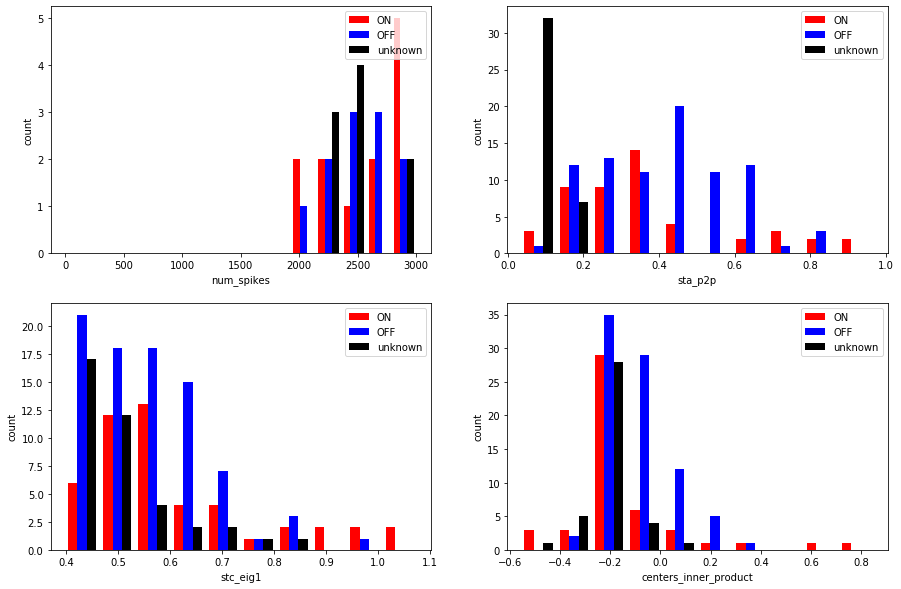

In [45]:
# check stats

plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_with_enough_spikes, "num_spikes", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"],
                         bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_group(cluster_with_enough_spikes, "sta_p2p", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(223)
pysta.plot_hist_by_group(cluster_with_enough_spikes, "stc_eig1", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(224)
pysta.plot_hist_by_group(cluster_with_enough_spikes, "centers_inner_product", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

# plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.pdf".format(cluster_dim,spike_per_dim))
# plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.png".format(cluster_dim,spike_per_dim))

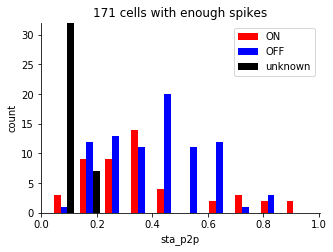

In [46]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_with_enough_spikes, "sta_p2p", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

# pysta.plot_hist_by_cell_type(cluster_with_enough_spikes,  "PSNR")
plt.title("{} cells with enough spikes".format(len(cluster_with_enough_spikes)))

plt.legend()

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove margin on the axes
# https://stackoverflow.com/a/42045987
#ax.margins(x=0, y=0)
ax.margins(y=0)

# plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_PSNR.pdf".format(cluster_dim,spike_per_dim))
# plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_PSNR.png".format(cluster_dim,spike_per_dim))

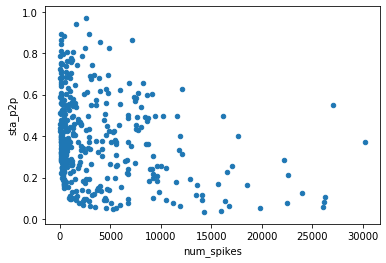

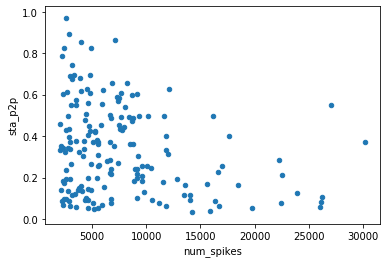

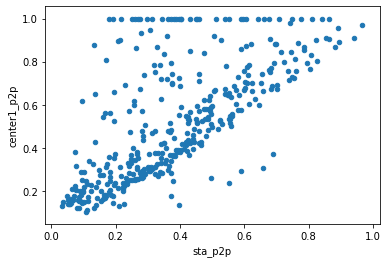

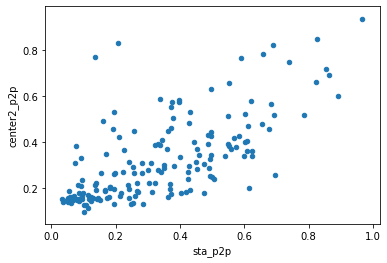

In [47]:
cluster.plot.scatter("num_spikes", "sta_p2p")
cluster_with_enough_spikes.plot.scatter("num_spikes", "sta_p2p")

cluster.plot.scatter("sta_p2p", "center1_p2p")
cluster_with_enough_spikes.plot.scatter("sta_p2p", "center2_p2p")


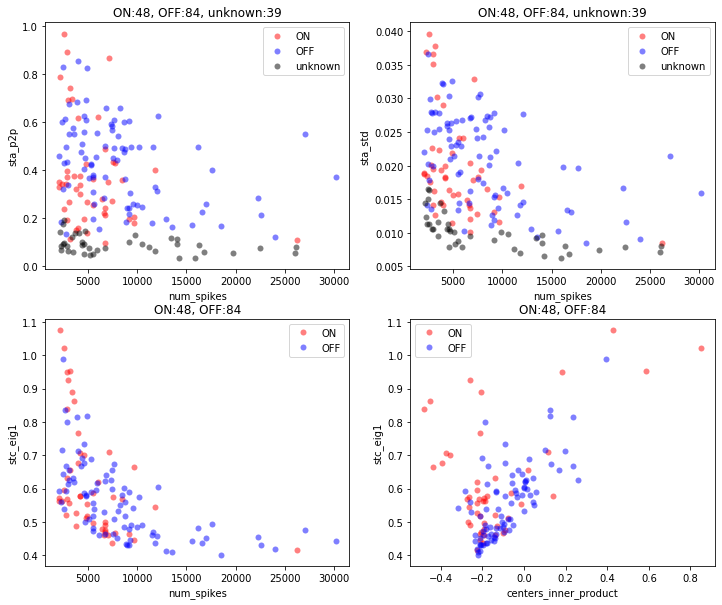

In [50]:
plot_scatter(cluster_with_enough_spikes)

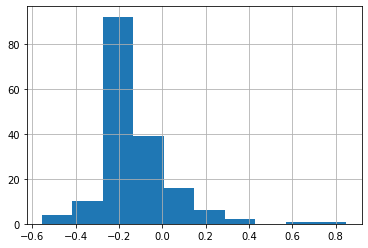

In [51]:
cluster_with_enough_spikes["centers_inner_product"].hist()

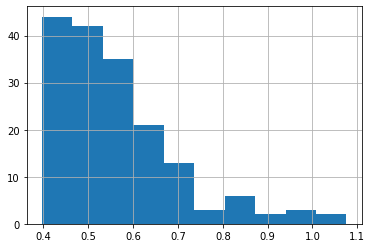

In [52]:
cluster_with_enough_spikes["stc_eig1"].hist()

In [ ]:
# idx_on = cluster_with_enough_spikes["cell_type"] == "ON"
# idx_off = cluster_with_enough_spikes["cell_type"] == "OFF"
# idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

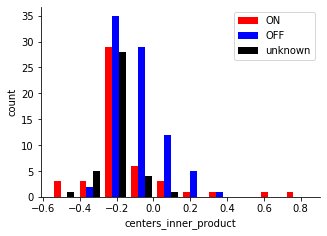

In [54]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_with_enough_spikes, "centers_inner_product", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.png'.format(cluster_dim,spike_per_dim))

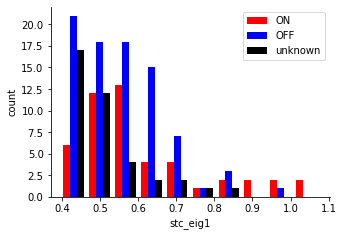

In [56]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_with_enough_spikes, "stc_eig1", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('figure/combined_cluster_dim{}_spd{}_eig1_hist.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/combined_cluster_dim{}_spd{}_eig1_hist.png'.format(cluster_dim,spike_per_dim))

Text(0, 0.5, '1st eigenvalue')

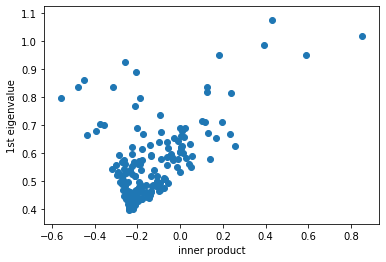

In [60]:
plt.scatter(cluster_with_enough_spikes["centers_inner_product"], cluster_with_enough_spikes["stc_eig1"])
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

Text(0.5, 1.0, '39 unknown cells out of 171')

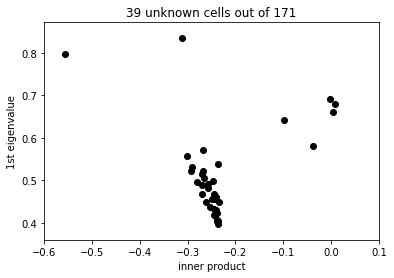

In [64]:
idx_unknown = cluster_with_enough_spikes["sta_cell_type"] == "unknown"

plt.scatter(cluster_with_enough_spikes.loc[idx_unknown,"centers_inner_product"], cluster_with_enough_spikes.loc[idx_unknown,"stc_eig1"], c="k")
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])
plt.title ("{} unknown cells out of {}".format(np.sum(idx_unknown),len(cluster_with_enough_spikes)))
# plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.png'.format(cluster_dim,spike_per_dim))

171
OFF        84
ON         48
unknown    39
Name: sta_cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: sta_cell_type, dtype: float64


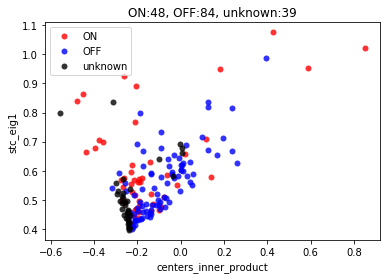

In [66]:
# def plot_inner_product_vs_eig1(cluster):
#     idx_on = cluster["cell_type"] == "ON"
#     idx_off = cluster["cell_type"] == "OFF"
#     idx_unknown = cluster["cell_type"] == "unknown"

#     plt.scatter(cluster.loc[idx_on,"inner_product"], cluster.loc[idx_on,"eig1"], c="r")
#     plt.scatter(cluster.loc[idx_off,"inner_product"], cluster.loc[idx_off,"eig1"], c="b")
#     plt.scatter(cluster.loc[idx_unknown,"inner_product"], cluster.loc[idx_unknown,"eig1"], c="k")
#     plt.xlabel('inner product')
#     plt.ylabel('1st eigenvalue')

#     plt.title ("ON:{}, OFF:{}, unknown:{}".format(np.sum(idx_on),np.sum(idx_off),np.sum(idx_unknown)))

#     plt.legend(["ON", "OFF", "unknown"])
    

print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["sta_cell_type"].value_counts())
print(cluster_with_enough_spikes["sta_cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["centers_inner_product", "stc_eig1"], 
                            group_key="sta_cell_type",
                            alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

# plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.png'.format(cluster_dim,spike_per_dim))




In [ ]:
print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["eig1", "inner_product"], alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))



In [ ]:
# cluster_with_enough_spikes.sort_values('eig1', ascending=False).head(30)

In [ ]:
cluster_with_enough_spikes.sort_values('inner_product').head(30)#.sort_values("dataset")
# cluster_with_enough_samples.sort_values(['dataset','inner_product'])

## threshold by PSNRs & sort by inner product

In [ ]:
PSNR_threshold = 8.5
idx_thresholded = (cluster_with_enough_spikes["inner_product"] < 0) & (cluster_with_enough_spikes["PSNR1"] > PSNR_threshold) & (cluster_with_enough_spikes["PSNR2"] > PSNR_threshold)
cluster_thresholded = cluster_with_enough_spikes.loc[idx_thresholded].sort_values('inner_product')

print(len(cluster_thresholded))
cluster_thresholded

In [ ]:
pysta.plot_scatter_by_group(cluster_thresholded, ["inner_product", "eig1"])
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [ ]:
pysta.plot_scatter_by_group(cluster_thresholded, ["eig1", "inner_product"])
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [ ]:
# # plot examples
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_temp".format(cluster_dim,spike_per_dim),
#                    temporal_profile=True, spatial_profile=False)
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_spatial".format(cluster_dim,spike_per_dim),
#                    temporal_profile=False, spatial_profile=True)

In [ ]:
# sort by inner product and plot
def plot_an_example(series, cluster_dim, temporal_profile=True, spatial_profile=[], filename_prefix=None):
    dataset_name = series["dataset"]
    folder_name = "{}_tap8_cov_classic_cluster_dim{}".format(dataset_name, cluster_dim)
    channel_name = series["channel_name"]
    cell_type = series["cell_type"]
    inner_product = series["inner_product"]

    PSNR = series["PSNR"]        
    PSNR1 = series["PSNR1"]
    PSNR2 = series["PSNR2"]

#     print(i, dataset_name, channel_name, cell_type, inner_product, PSNR1, PSNR2)
    
    if temporal_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_centers.png".format(channel_name)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        plt.title(dataset_name + " " + channel_name + " ({})".format(cell_type))
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_temporal.png".format(dataset_name,channel_name))
#             print("{}_{}_{}_temporal.png".format(filename,dataset_name,channel_name))

    for group_idx in spatial_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_center_{}.png".format(channel_name,group_idx)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_spatial_{}.png".format(dataset_name,channel_name,group_idx))
#             print("{}_{}_{}_spatial_{}.png".format(filename,dataset_name,channel_name,group_idx))

        
def plot_examples(cluster_sorted, cluster_dim, temporal_profile=True, spatial_profile=[], 
                  folder_name=None):            
    for i in range(len(cluster_sorted)):
        
        if folder_name is not None:
            if not os.path.exists(folder_name):
                os.makedirs(folder_name)            
            filename_i = os.path.join(folder_name, "{:02d}".format(i))
        else:
            filename_i = None

        plot_an_example(cluster_sorted.iloc[i], cluster_dim, temporal_profile=temporal_profile, spatial_profile=spatial_profile, filename_prefix=filename_i)
        plt.close()

        
plot_examples(cluster_thresholded, cluster_dim,
              folder_name = "combined_cluster_dim{}_spd{}_sorted_by_inner_product".format(cluster_dim,spike_per_dim))

## manually check using saved temporal profiles

In [ ]:
# double check  (dim=2, spd=5)
# plot_an_example(cluster_thresholded.iloc[13], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[16], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[28], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[27], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK

# double check  (dim=2, spd=4)
# plot_an_example(cluster_thresholded.iloc[16], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[20], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# plot_an_example(cluster_thresholded.iloc[17], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[25], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[52], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # does not overlap spatially


# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[32], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])



# double check  (dim=2, spd=1)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[15], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[39], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[43], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope



In [ ]:
# manual inspection


if cluster_dim==2:
    if spike_per_dim == 5:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 28]
    elif spike_per_dim == 4:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 31]
    elif spike_per_dim == 3:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                 21, 23, 32]
    elif spike_per_dim ==2:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
    elif spike_per_dim == 1:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
        
elif cluster_dim==3:
    idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]
    pass
else:
    pass

cluster_checked = cluster_thresholded.iloc[idx_checked]

cluster_checked.to_csv("on_and_off_dim{}.csv".format(cluster_dim), index=None)

print(len(cluster_checked))

In [ ]:
# plt.figure(figsize=(7,15))
# plt.subplot(311)
# plot_inner_product_vs_eig1(cluster_with_enough_spikes)
# plt.xlim([-0.6, 0])
# plt.subplot(312)
# plot_inner_product_vs_eig1(cluster_thresholded)
# plt.xlim([-0.6, 0])
# plt.subplot(313)
# plot_inner_product_vs_eig1(cluster_checked)
# plt.xlim([-0.6, 0])

In [ ]:
cluster_checked["cell_type_on_and_off"]=True

cluster_checked.to_csv("cluster_dim{}_on_and_off_checked.csv".format(cluster_dim))
cluster_checked

In [ ]:
## check statistics
cluster_combined = cluster_with_enough_spikes
# cluster_combined["cell_type_clustered"]=cluster_combined["cell_type"]
cluster_combined = cluster_combined.merge(cluster_checked[["dataset", "channel_name","cell_type_on_and_off"]], on=["dataset", "channel_name"], how="outer")

# fill NaN with original cell_type
idx_null = cluster_combined["cell_type_on_and_off"].isnull()
cluster_combined.loc[idx_null, "cell_type_on_and_off"] = False

# combine original cell_type
cluster_combined["cell_type_combined"] = cluster_combined["cell_type"]
cluster_combined.loc[~idx_null,"cell_type_combined"] = "ON/OFF"

cluster_combined


In [ ]:
# save to .csv
filename = "cluster_combined_dim{}_spd{}.csv".format(cluster_dim,spike_per_dim)
print(filename)
cluster_combined.to_csv(filename, index=None)

In [ ]:
cluster_combined["cell_type_on_and_off"].value_counts()

In [ ]:
cluster_combined.groupby("cell_type_on_and_off")["cell_type"].value_counts()

In [ ]:
print(cluster_combined["cell_type"].value_counts()[["ON","OFF","unknown"]])
print(cluster_combined["cell_type_combined"].value_counts()[["ON","OFF","ON/OFF","unknown"]])

In [ ]:
print(cluster_combined["cell_type"].value_counts()[["ON","OFF","unknown"]] / len(cluster_combined))
print(cluster_combined["cell_type_combined"].value_counts()[["ON","OFF","ON/OFF","unknown"]] / len(cluster_combined))

In [ ]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"])
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.ylim(0,22)
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([0, 5, 10, 15, 20])

plt.legend(loc="upper left")

plt.savefig('figure/cluster_dim{}_spd{}_checked_PSNR_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_PSNR_hist.png'.format(cluster_dim,spike_per_dim))

In [ ]:
plt.figure(figsize=(5,3.5))

pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"])
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.ylim(0,22)
plt.yticks([0, 5, 10, 15, 20])

plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.png'.format(cluster_dim,spike_per_dim))

In [ ]:
plt.figure(figsize=(5,3.5))

bins = np.linspace(-0.6, 0.85, 29+1)
# bins = np.linspace(-0.6, 0.8, 28+1)
# bins = np.linspace(-0.6, 0.4, 20+1)#15)
# bins = np.linspace(-0.6, 0.3, 18+1)
# bins = np.linspace(-0.5, 0.3, 16+1)
print(bins)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"],
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"],
                        )
#                          bins=bins)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.yticks([0, 5, 10, 15])

plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.png'.format(cluster_dim,spike_per_dim))


In [ ]:
# plot inner_product vs. eig1

# plt.figure(figsize=(8,6))
plt.figure(figsize=(5,3.5))

pysta.plot_scatter_by_group(cluster_combined, ["eig1","inner_product"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r","b","g"], alpha=0.5)                            
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"]


# plt.xlim(0.3, 1)
# plt.ylim(-0.6, 0.3)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))

In [ ]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"],
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b","r","k"], alpha=1)                            
                            "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

plt.xlim(-0.6, 0)
plt.ylim(0.3, 1)

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [ ]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
#pysta.plot_scatter_by_group(cluster_combined, ["num_spikes", "eig1"],
pysta.plot_scatter_by_group(cluster_combined, ["num_spikes", "PSNR"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

# plt.xlim(-0.6, 0)
# plt.ylim(0.3, 1)

# plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
# plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [ ]:
tt = cluster_combined[cluster_combined["inner_product"] < -0.2]
tt = tt[tt["cell_type_combined"]=="OFF"]
tt = tt[tt["eig1"] < 0.6]
tt = tt[tt["eig1"] > 0.55]
tt.sort_values("eig1", ascending=False)
#tt = cluster_combined[cluster_combined["cell_type_combined"]=="OFF"].sort_values("eig1", ascending=False)
#idx_neg = tt["inner_product"] < 0
#tt.loc[idx_neg]

In [ ]:
plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"], 
                            "cell_type_combined", ["ON/OFF"], ['g'])

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.png'.format(cluster_dim,spike_per_dim))

idx = cluster_combined["cell_type_combined"] == "ON/OFF"
np.corrcoef(cluster_combined.loc[idx,"inner_product"],cluster_combined.loc[idx,"eig1"])[0,1]

In [ ]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r",'b','g'],
                         density=False)

In [ ]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r",'b','g'],
                         density=False)

In [ ]:
cluster.groupby("cell_type").mean()

In [ ]:
cluster.groupby("cell_type").median()

In [ ]:
cluster_with_enough_spikes.groupby("cell_type").mean()

In [ ]:
cluster_with_enough_spikes.groupby("cell_type").median()

In [ ]:
cluster_combined.groupby("cell_type_combined").mean()

In [ ]:
cluster_combined.groupby("cell_type_combined").median()

In [ ]:
# plt.figure()
bins_for_num_spikes=np.linspace(0,15000,15)

plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'], bins=bins_for_num_spikes)
# plt.figure()
plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "PSNR1", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "PSNR2", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'], bins=bins_for_num_spikes)

plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.savefig("figure/cluster_result_dim{}_spd{}.png".format(cluster_dim,spike_per_dim))
plt.savefig("figure/cluster_result_dim{}_spd{}.pdf".format(cluster_dim,spike_per_dim))
# cluster_combined.hist("PSNR", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR1", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR2", by="cell_type_clustered", sharex=True)


In [ ]:
# original cell type vs. clustered
# col = "PSNR"
col = "num_spikes"
plt.figure()
pysta.plot_hist_by_cell_type(cluster_combined, col, bins=bins_for_num_spikes)
plt.figure()
pysta.plot_hist_by_group(cluster_combined, col, "cell_type_combined", 
                         ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"], bins=bins_for_num_spikes)

In [ ]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

In [ ]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])                         
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

In [ ]:
plot_examples(cluster_checked, cluster_dim, temporal_profile=True, spatial_profile=[1, 2], filename="combined_cluster_dim{}_spd{}_checked".format(cluster_dim,spike_per_dim))

In [ ]:
# plt.hist(PSNR1_selected)
# plt.show()
# plt.hist(PSNR2_selected)
# plt.show()
# plt.scatter(PSNR1_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR1')
# plt.ylabel('PSNR2')
# plt.show()
# plt.scatter(PSNR_selected,PSNR1_selected)
# plt.scatter(PSNR_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR')
# plt.legend(['','PSNR1', 'PSNR2'])
# plt.show()

In [ ]:

plt.hist(cluster_checked["cell_type"])

print(len(cluster_checked))
cluster_checked["cell_type"].value_counts()

In [ ]:
# # sort by inner product and plot

# cluster_sorted_by_eig1 = cluster_with_enough_samples.sort_values('eig1').head(30)#.sort_values("dataset")

# plot_examples(cluster_sorted_by_eig1, "cluster_eig", dim=dim)




In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR1"])
plt.plot([7.5,25], [7.5,25], 'k--')
plt.subplot(122)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR2"])
plt.plot([7.5,25], [7.5,25], 'k--')

In [ ]:
plot_scatter(cluster_checked)

## compare results with d=2 and d=3

In [ ]:
on_and_off_dim2 = pd.read_csv("on_and_off_dim2.csv")
on_and_off_dim3 = pd.read_csv("on_and_off_dim3.csv")



channel_on_and_off_dim2 = set(on_and_off_dim2["channel_name"])
channel_on_and_off_dim3 = set(on_and_off_dim3["channel_name"])
channel_on_and_off_union = channel_on_and_off_dim2.union(channel_on_and_off_dim3)
channel_on_and_off_intersection = channel_on_and_off_dim2.intersection(channel_on_and_off_dim3)

print(len(channel_on_and_off_dim2))
print(len(channel_on_and_off_dim3))
print(len(channel_on_and_off_union))
print(len(channel_on_and_off_intersection))

print("union:", channel_on_and_off_union)
print("intersect:", channel_on_and_off_intersection)
print("dim=2 only:", channel_on_and_off_dim2 - channel_on_and_off_dim3)
print("dim=3 only:", channel_on_and_off_dim3 - channel_on_and_off_dim2)

In [ ]:
# compare results
d2 = np.load("data/clustered_dim2.npz", allow_pickle=True)
d2_channel_names = [info["channel_name"] for info in d2["info"]]

d3 = np.load("data/clustered_dim3.npz", allow_pickle=True)
d3_channel_names = [info["channel_name"] for info in d3["info"]]    

def find_channel_index(channel_names, channel_name):
    for i, ch in enumerate(channel_names):
        if ch == channel_name:
            return i
    return None # not found

for channel_name in channel_on_and_off_union:
    print(channel_name)
        
    idx2 = find_channel_index(d2_channel_names, channel_name)
    idx3 = find_channel_index(d3_channel_names, channel_name)    
#     print(idx2, idx3)

    is_on_and_off_dim2 = channel_name in channel_on_and_off_dim2    
    is_on_and_off_dim3 = channel_name in channel_on_and_off_dim3
    print(is_on_and_off_dim2, is_on_and_off_dim3)
    
    sta = d2['X_train'][idx2]
    group_center1 = d2['X_test'][idx2*2]
    group_center2 = d2['X_test'][idx2*2+1]    

    tap = 8
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    
    sta = d3['X_train'][idx3]
    group_center1 = d3['X_test'][idx3*2]
    group_center2 = d3['X_test'][idx3*2+1]    
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    

In [ ]:
 d2['X_test'].shape

In [ ]:
d2["X_train"].shape

In [ ]:
d3_channel_names

In [ ]:
for k in d2.keys():
    print(k)